# Laporan Proyek 1

## Pengembangan Model Prediksi Harga Chainlink (LINK-USD) Berbasis Machine Learning untuk Analisis Fluktuasi Pasar Kripto

## Pendahuluan

## Latar Belakang
Cryptocurrency adalah aset digital yang menggunakan blockchain untuk mencatat transaksi secara transparan dan aman. Chainlink (LINK) adalah platform oracle terdesentralisasi yang menghubungkan smart contract dengan data dunia nyata, menjadikannya penting dalam berbagai proyek berbasis blockchain.

Namun, harga Chainlink (LINK-USD) sangat fluktuatif, dipengaruhi oleh sentimen pasar, regulasi, dan kondisi ekonomi global, sehingga menyulitkan investor dalam mengambil keputusan. Teknologi seperti machine learning dapat digunakan untuk memprediksi harga berdasarkan data historis, membantu mengurangi risiko dan mendukung keputusan investasi yang lebih baik.

## Tujuan Proyek
Proyek ini bertujuan untuk membangun model prediksi harga cryptocurrency Chainlink (LINK-USD) dengan memanfaatkan data historis. Analisis ini diharapkan mampu:

- Mendukung investor dalam mengambil keputusan investasi yang lebih berbasis data.
- Menyediakan wawasan mengenai potensi fluktuasi harga Chainlink guna meningkatkan peluang keuntungan dan meminimalkan risiko secara lebih efektif.

## Rumusan Masalah
- Bagaimana membangun model yang mampu memprediksi harga Chainlink (LINK-USD) secara akurat menggunakan data historis?
- Bagaimana prediksi harga Chainlink dapat dimanfaatkan untuk meningkatkan kualitas keputusan investasi di pasar cryptocurrency?

## Metodologi

## Data Understanding
a. Sumber Data Data yang saya gunakan pada proyek ini diperoleh dari website https://finance.yahoo.com/quote/LINK-USD/history/?period1=1607212800&period2=1733443200, platform online yang menyediakan data keuangan pasar secara real-time.

Dalam proyek ini, data historis yang digunakan mencakup rentang waktu dari 06 Desember 2022 hingga 06 Desember 2024, yang diperoleh dalam format file CSV.

## Project

With MyST Markdown, you can define code cells with a directive like so:

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
df = pd.read_csv('https://raw.githubusercontent.com/windaafitri/dataset/refs/heads/main/chainlink.csv')

# mengubah kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengatur kolom 'Date' sebagai indeks
df.set_index('Date', inplace=True)

# Mensortir data berdasarkan kolom Date dari terkecil ke terbesar
df = df.sort_values(by='Date')
print(df)

            Open  High   Low  Close  Adj Close      Volume
Date                                                      
2022-12-06   7.3   7.3   7.0    7.1        7.1   253542935
2022-12-07   7.1   7.1   6.8    6.9        6.9   238394478
2022-12-08   6.9   7.1   6.8    7.0        7.0   198390377
2022-12-09   7.0   7.0   6.8    6.9        6.9   163188841
2022-12-10   6.9   6.9   6.8    6.9        6.9   138343803
...          ...   ...   ...    ...        ...         ...
2024-12-01  19.0  19.1  18.5   18.9       18.9   638179234
2024-12-02  18.9  26.5  18.7   25.1       25.1  8935516000
2024-12-03  25.1  26.1  23.0   24.2       24.2  3344542573
2024-12-04  24.2  26.3  23.7   24.1       24.1  2233316427
2024-12-05  24.1  24.7  23.1   23.4       23.4  1655548492

[731 rows x 6 columns]


b. Deskripsi Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2022-12-06 to 2024-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       731 non-null    float64
 1   High       731 non-null    float64
 2   Low        731 non-null    float64
 3   Close      731 non-null    float64
 4   Adj Close  731 non-null    float64
 5   Volume     731 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.0 KB


In [4]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()

,Open,High,Low,Close,Adj Close,Volume
count,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,11.162791,11.505062,10.841587,11.184679,11.184679,3.982736e+08
std,4.512113,4.710279,4.343302,4.532611,4.532611,4.333476e+08
min,5.100000,5.200000,5.000000,5.100000,5.100000,6.901831e+07
25%,7.000000,7.200000,6.800000,7.000000,7.000000,1.969127e+08
50%,10.900000,11.200000,10.500000,10.900000,10.900000,2.885893e+08
75%,14.500000,15.000000,14.100000,14.500000,14.500000,4.897816e+08
max,25.100000,26.500000,23.700000,25.100000,25.100000,8.935516e+09


In [5]:
# Mencari Missing Value
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Understanding

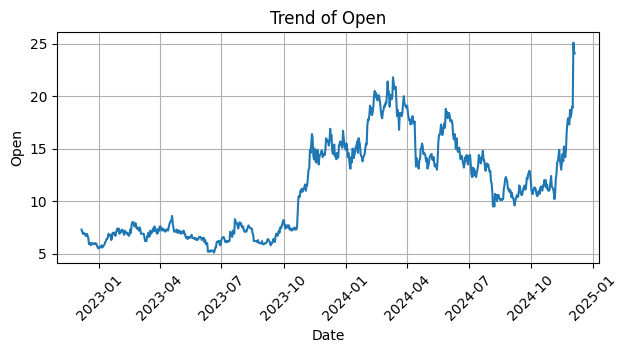

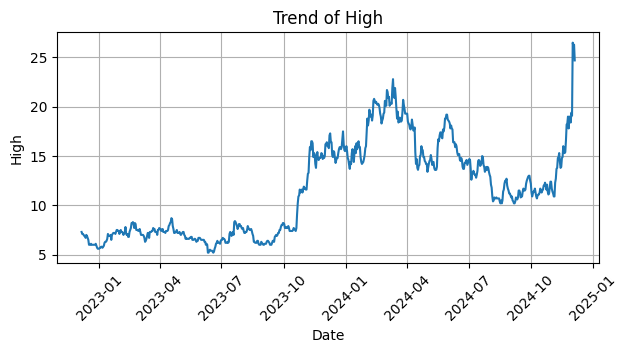

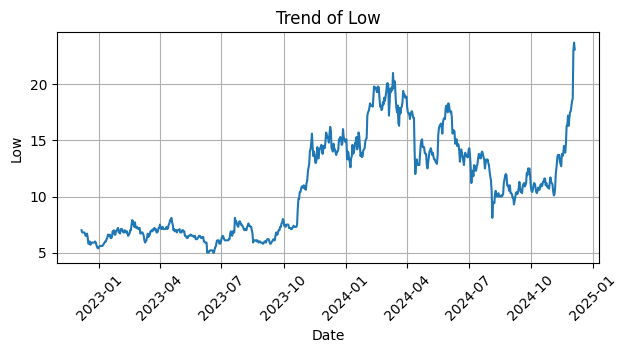

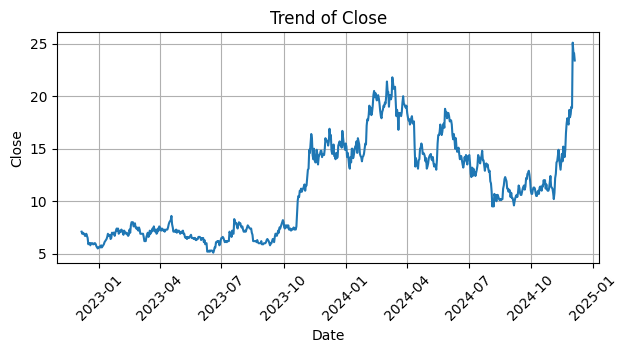

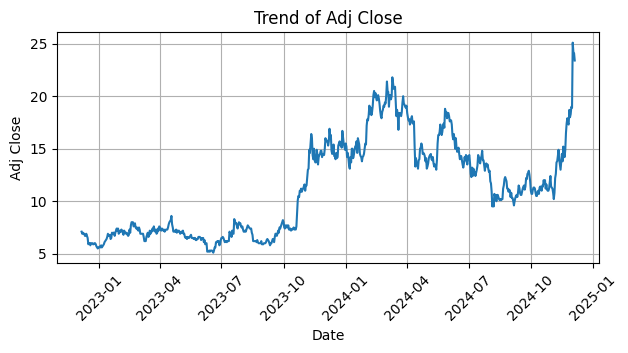

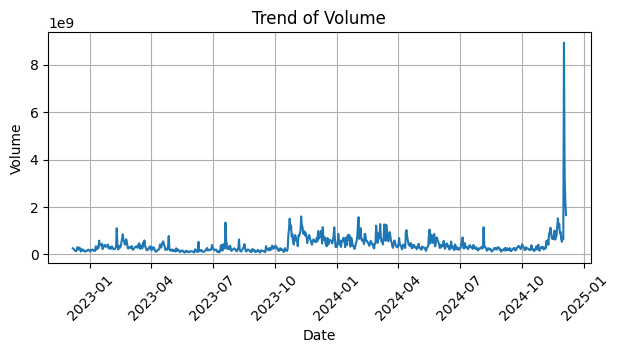

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df:
    plt.figure(figsize=(7, 3))
    sns.lineplot(data=df, x='Date', y=col)
    plt.title(f'Trend of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

korelasi antar fitur

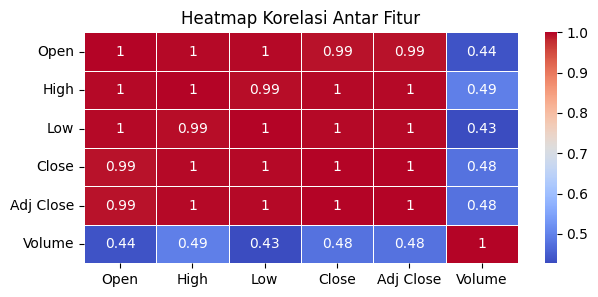

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [8]:
df = df.drop(columns=['Volume', 'Adj Close'])
df.head()

,Open,High,Low,Close
Date,,,,
2022-12-06,7.3,7.3,7.0,7.1
2022-12-07,7.1,7.1,6.8,6.9
2022-12-08,6.9,7.1,6.8,7.0
2022-12-09,7.0,7.0,6.8,6.9
2022-12-10,6.9,6.9,6.8,6.9


In [9]:
df['Close Target'] = df['Close'].shift(-1)

df = df[:-1]
df.head()

,Open,High,Low,Close,Close Target
Date,,,,,
2022-12-06,7.3,7.3,7.0,7.1,6.9
2022-12-07,7.1,7.1,6.8,6.9,7.0
2022-12-08,6.9,7.1,6.8,7.0,6.9
2022-12-09,7.0,7.0,6.8,6.9,6.9
2022-12-10,6.9,6.9,6.8,6.9,6.7


In [10]:
# Inisialisasi scaler untuk fitur (input) dan target (output)
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

# Normalisasi fitur (Open, High, Low,, 'Close' Close Target-4, Close Target-5)
df_features_normalized = pd.DataFrame(scaler_features.fit_transform(df[['Open', 'High', 'Low', 'Close']]),
                                      columns=['Open', 'High', 'Low', 'Close'],
                                      index=df.index)

# Normalisasi target (Close Target)
df_target_normalized = pd.DataFrame(scaler_target.fit_transform(df[['Close Target']]),
                                    columns=['Close Target'],
                                    index=df.index)

# Gabungkan kembali dataframe yang sudah dinormalisasi
df_normalized = pd.concat([df_target_normalized, df_features_normalized], axis=1)
df_normalized.head()

,Close Target,Open,High,Low,Close
Date,,,,,
2022-12-06,0.090,0.110,0.098592,0.106952,0.100
2022-12-07,0.095,0.100,0.089202,0.096257,0.090
2022-12-08,0.090,0.090,0.089202,0.096257,0.095
2022-12-09,0.090,0.095,0.084507,0.096257,0.090
2022-12-10,0.080,0.090,0.079812,0.096257,0.090


In [11]:
# Mengatur fitur (X) dan target (y)
X = df_normalized[['Open', 'High', 'Low', 'Close']]
y = df_normalized['Close Target']

# Membagi data menjadi training dan testing (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

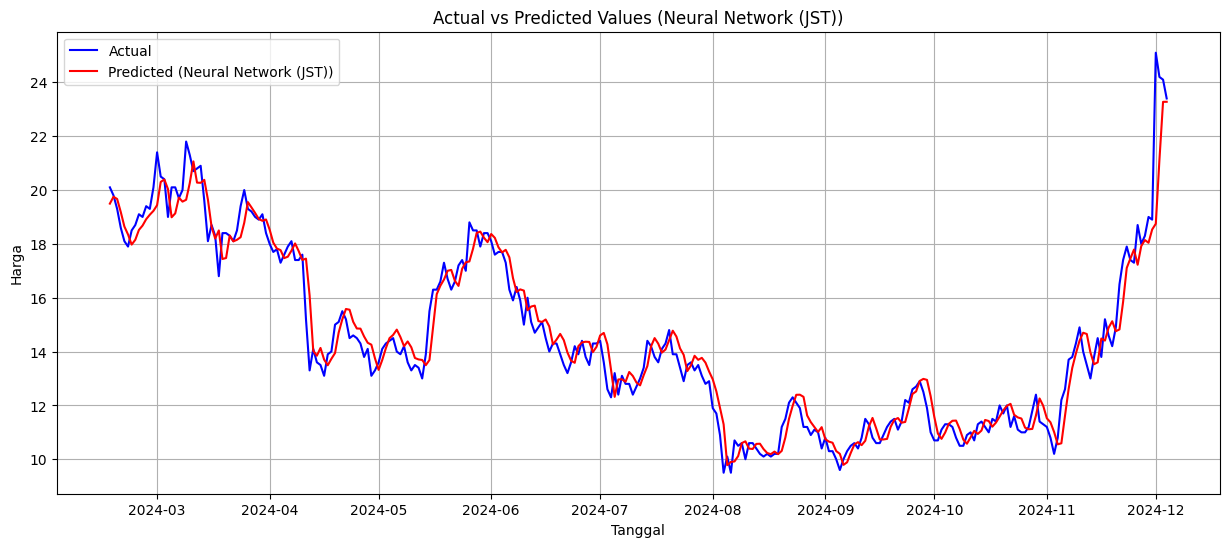

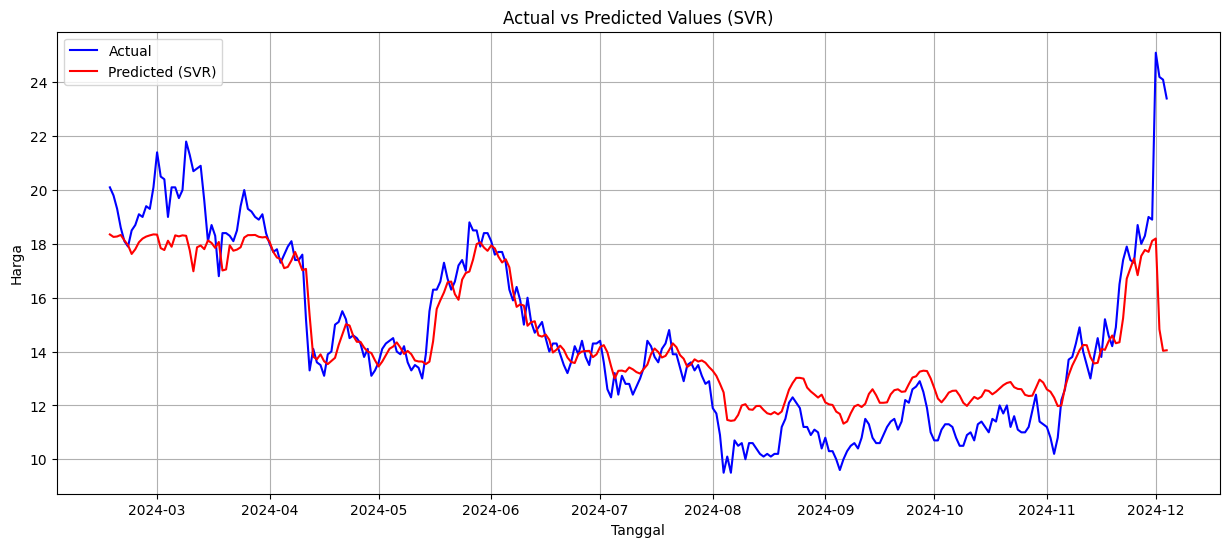

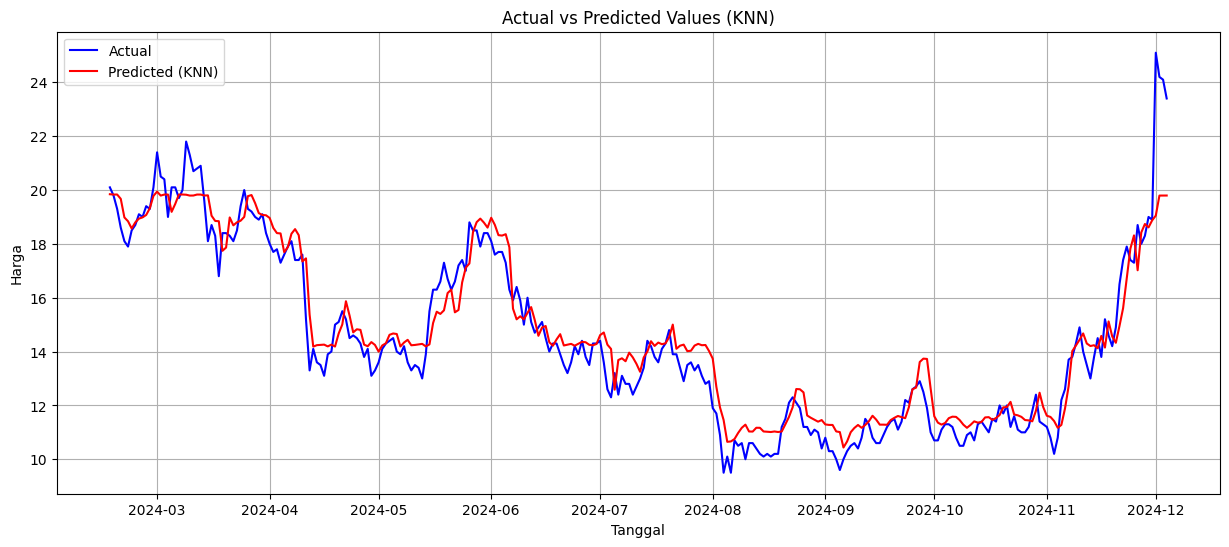

Neural Network (JST):
  RMSE: 0.04
  MAPE: 6.23%

SVR:
  RMSE: 0.08
  MAPE: 12.39%

KNN:
  RMSE: 0.05
  MAPE: 8.17%



In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# List model untuk ensemble Bagging
models = {
    "Neural Network (JST)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=32),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Iterasi setiap model
for i, (name, base_model) in enumerate(models.items()):
    # Inisialisasi Bagging Regressor
    bagging_model = BaggingRegressor(
        estimator=base_model,
        n_estimators=10,
        max_samples=0.7,
        random_state=32,
        bootstrap=True
    )

    # Latih model
    bagging_model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = bagging_model.predict(X_test)

    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Dalam persen

    # Simpan hasil evaluasi
    results[name] = {"RMSE": rmse, "MAPE": mape}

    # Kembalikan hasil prediksi ke skala asli
    y_pred_original = scaler_target.inverse_transform(y_pred.reshape(-1, 1))
    y_test_original = scaler_target.inverse_transform(y_test.values.reshape(-1, 1))

    # Plot hasil prediksi
    plt.figure(figsize=(15, 6))
    plt.plot(y_test.index, y_test_original, label="Actual", color="blue")
    plt.plot(y_test.index, y_pred_original, label=f"Predicted ({name})", color="red")

    # Tambahkan detail plot
    plt.title(f'Actual vs Predicted Values ({name})')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.legend()
    plt.grid(True)

    # Tampilkan plot
    plt.show()

# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"{model}:\n  RMSE: {metrics['RMSE']:.2f}\n  MAPE: {metrics['MAPE']:.2f}%\n")